Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](img/descargar.png)

In [1]:
library(cluster)
library(dendextend)
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=10,repr.plot.width=16,repr.plot.res = 300)


---------------------
Welcome to dendextend version 1.13.4
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
airbnb_filter <- airbnb[ , c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
head(airbnb_filter)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Barcelona,Entire home/apt,El Gòtic,2,1,0,1,349,NA,1,0,NA,41.38389,2.171802
2,Barcelona,Entire home/apt,El Raval,6,1,2,3,165,NA,4,20,93,41.38266,2.167558
3,Barcelona,Entire home/apt,Dreta de l'Eixample,5,1,2,2,129,NA,3,20,94,41.38847,2.168451
4,Barcelona,Entire home/apt,La Sagrada Família,5,1,2,2,90,NA,1,0,100,41.40259,2.176946
5,Barcelona,Entire home/apt,La Sagrada Família,6,1,2,3,89,NA,1,0,100,41.40501,2.173369
6,Barcelona,Entire home/apt,Sants-Montjuïc,5,2,3,3,68,NA,1,0,84,41.36726,2.147609


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [3]:
df_madrid = with(airbnb_filter, airbnb_filter[City == 'Madrid' & Room.Type == "Entire home/apt" & Neighbourhood != '', ! names(airbnb_filter) %in% c('Room.Type','City')])
df_madrid$Neighbourhood<-droplevels(df_madrid$Neighbourhood, exclude = if(anyNA(levels(df_madrid$Neighbourhood))) NA)
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
26,Palacio,3,1,0,2,65,NA,2,10,96,40.41706,-3.709482
27,Palacio,5,2,2,3,100,NA,4,25,97,40.41934,-3.709556
28,Palacio,6,1,2,4,89,NA,2,10,94,40.42113,-3.708628
29,La Latina,4,1,1,2,49,0,2,20,89,40.41203,-3.709668
30,La Latina,4,1,1,1,89,NA,2,15,97,40.41205,-3.708516
33,La Latina,2,1,1,1,61,NA,1,0,95,40.41189,-3.712093


Añadir una nueva columna Square.Meters

In [4]:
df_madrid$Square.Meters <- df_madrid$Square.Feet*0.092903

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [5]:
sm <- df_madrid[ , 'Square.Meters']
print(paste("Hay un ", length(sm[is.na(sm)]) / length(sm) * 100,"% de NAs"))

[1] "Hay un  93.8046777361185 % de NAs"


De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [6]:
print(paste("Hay un ", length(sm[!is.na(sm) & sm == 0]) / length(!is.na(sm))* 100,"% de 0es"))

[1] "Hay un  2.28530619532226 % de 0es"


Reemplazar todos los 0m^2 por NA 

In [7]:
df_madrid$Square.Meters[df_madrid$Square.Meters == 0 ]<-NA

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA.

Antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.

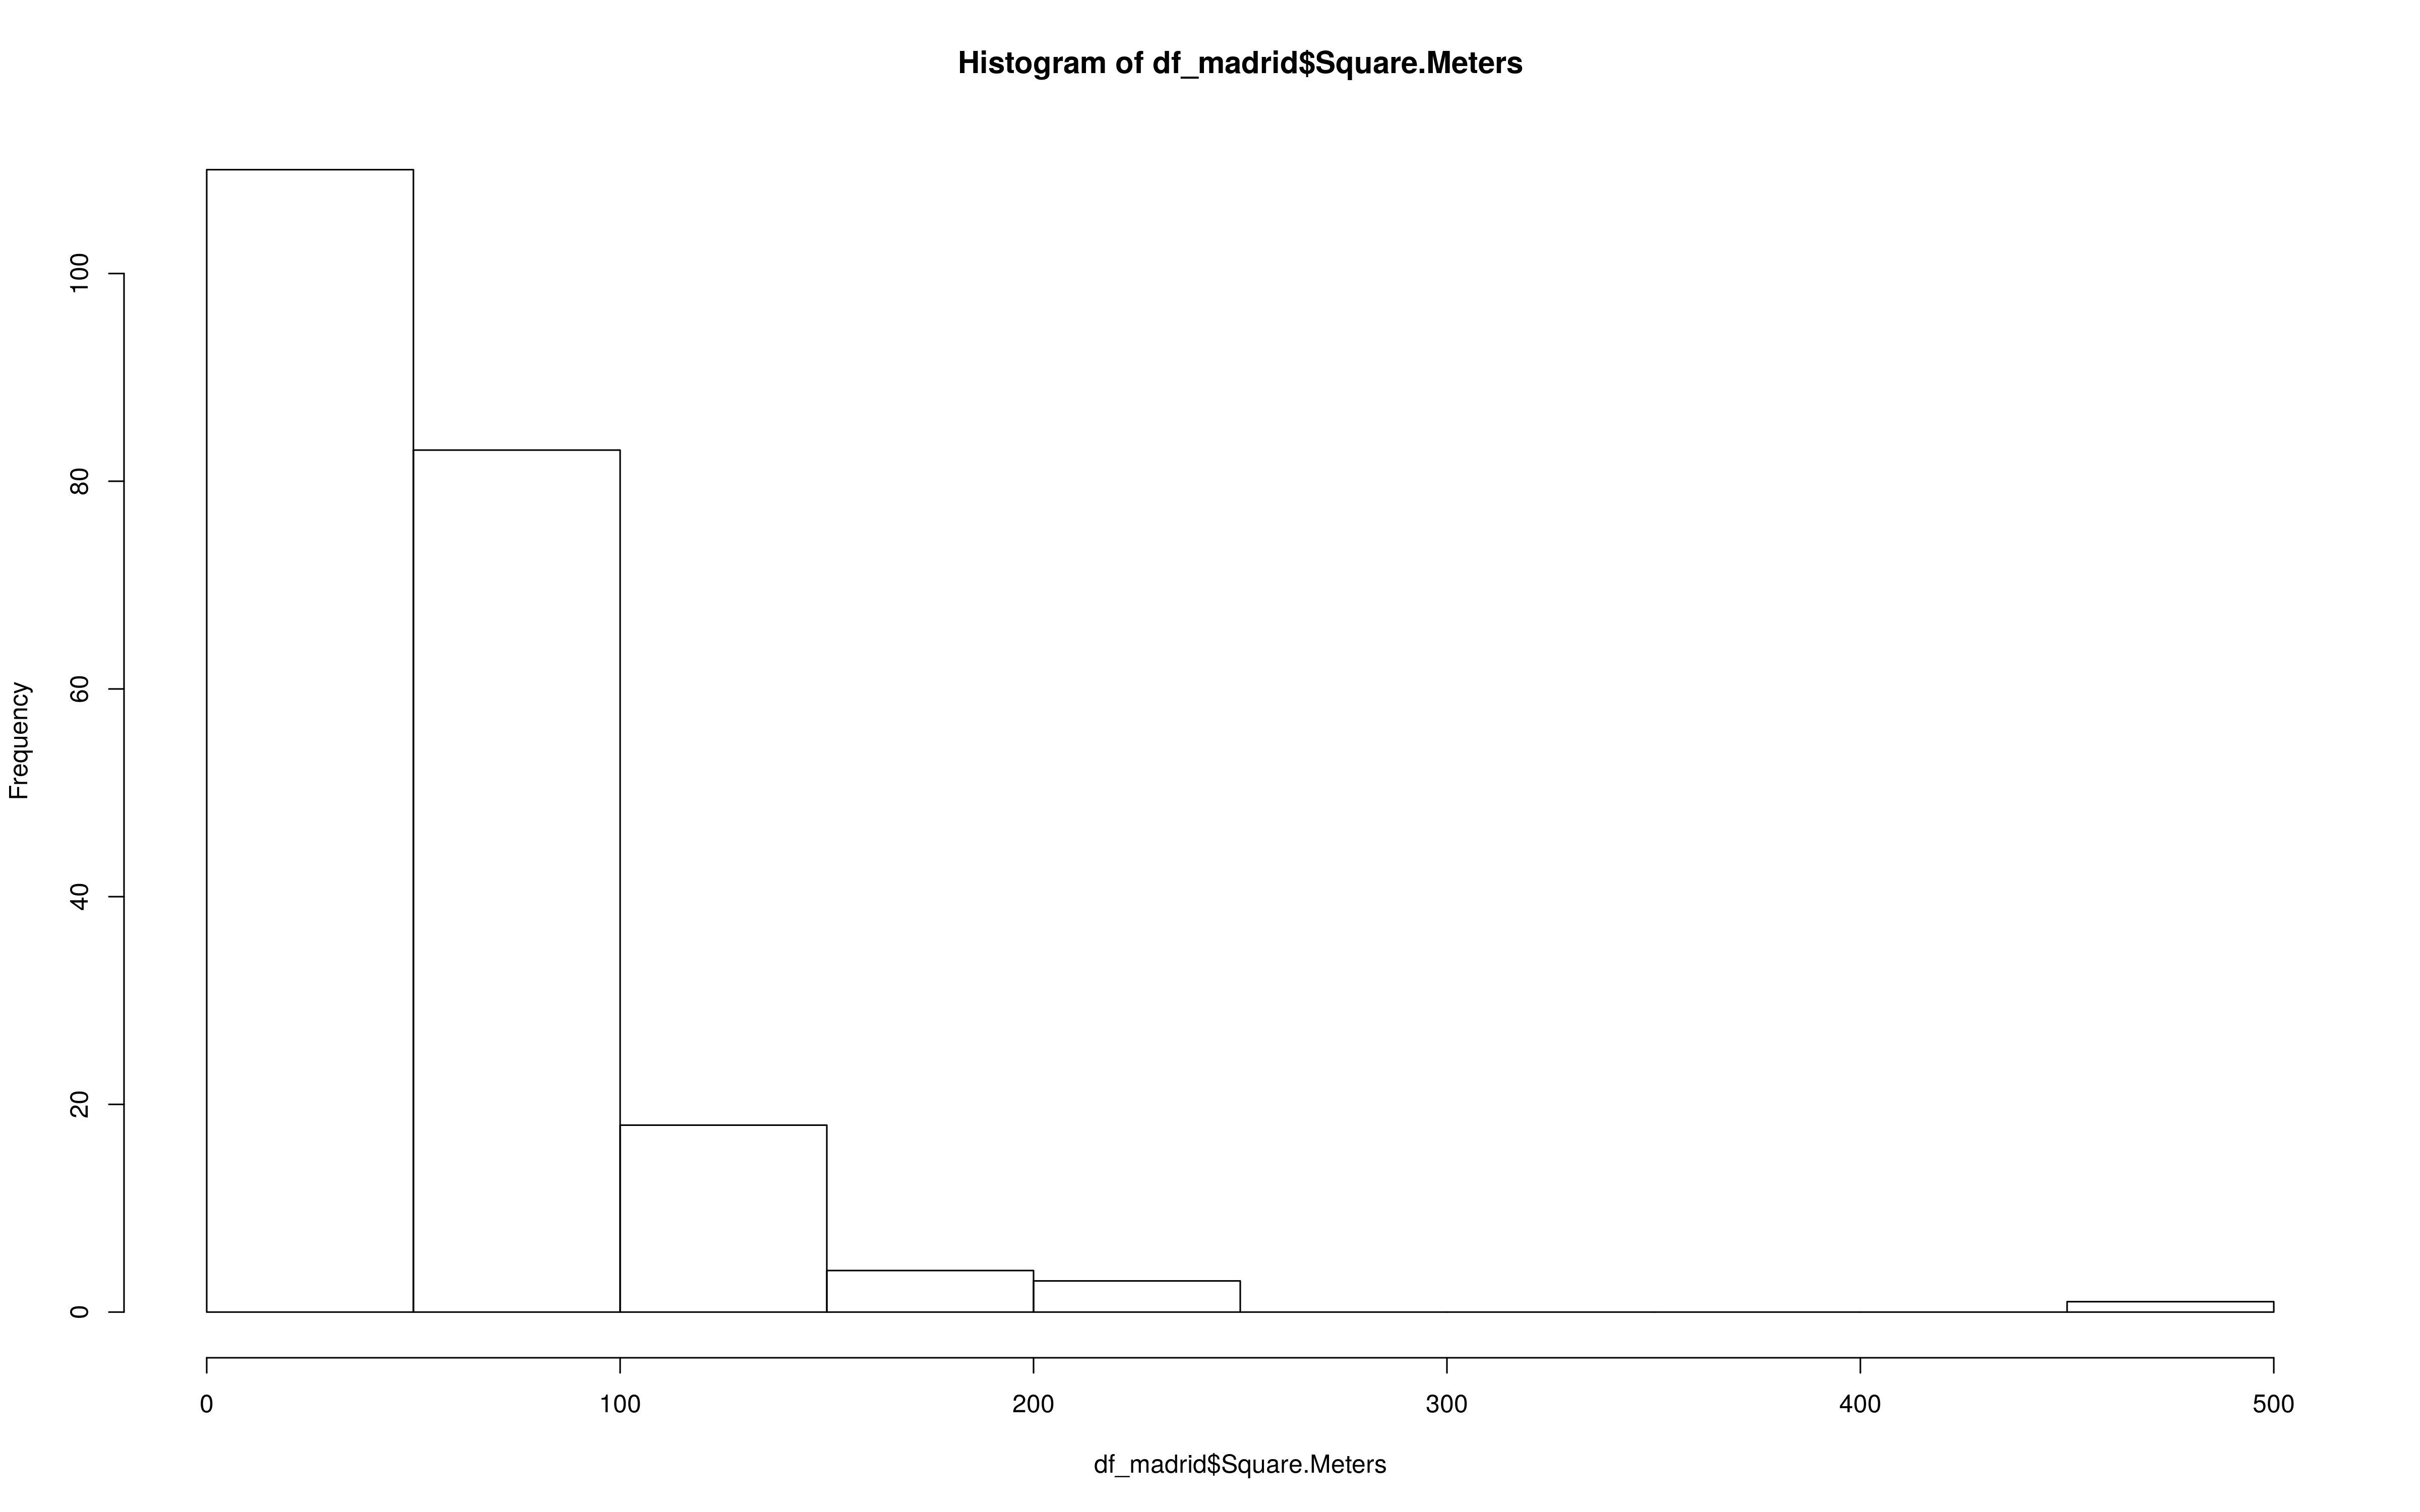

In [8]:
hist(df_madrid$Square.Meters)

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [9]:
df_madrid$Square.Meters[df_madrid$Square.Meters < 20 ]<-NA

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Warning message in resm[lower.tri(resm)] <- round(tky.result$p.adj, 4):
“number of items to replace is not a multiple of replacement length”


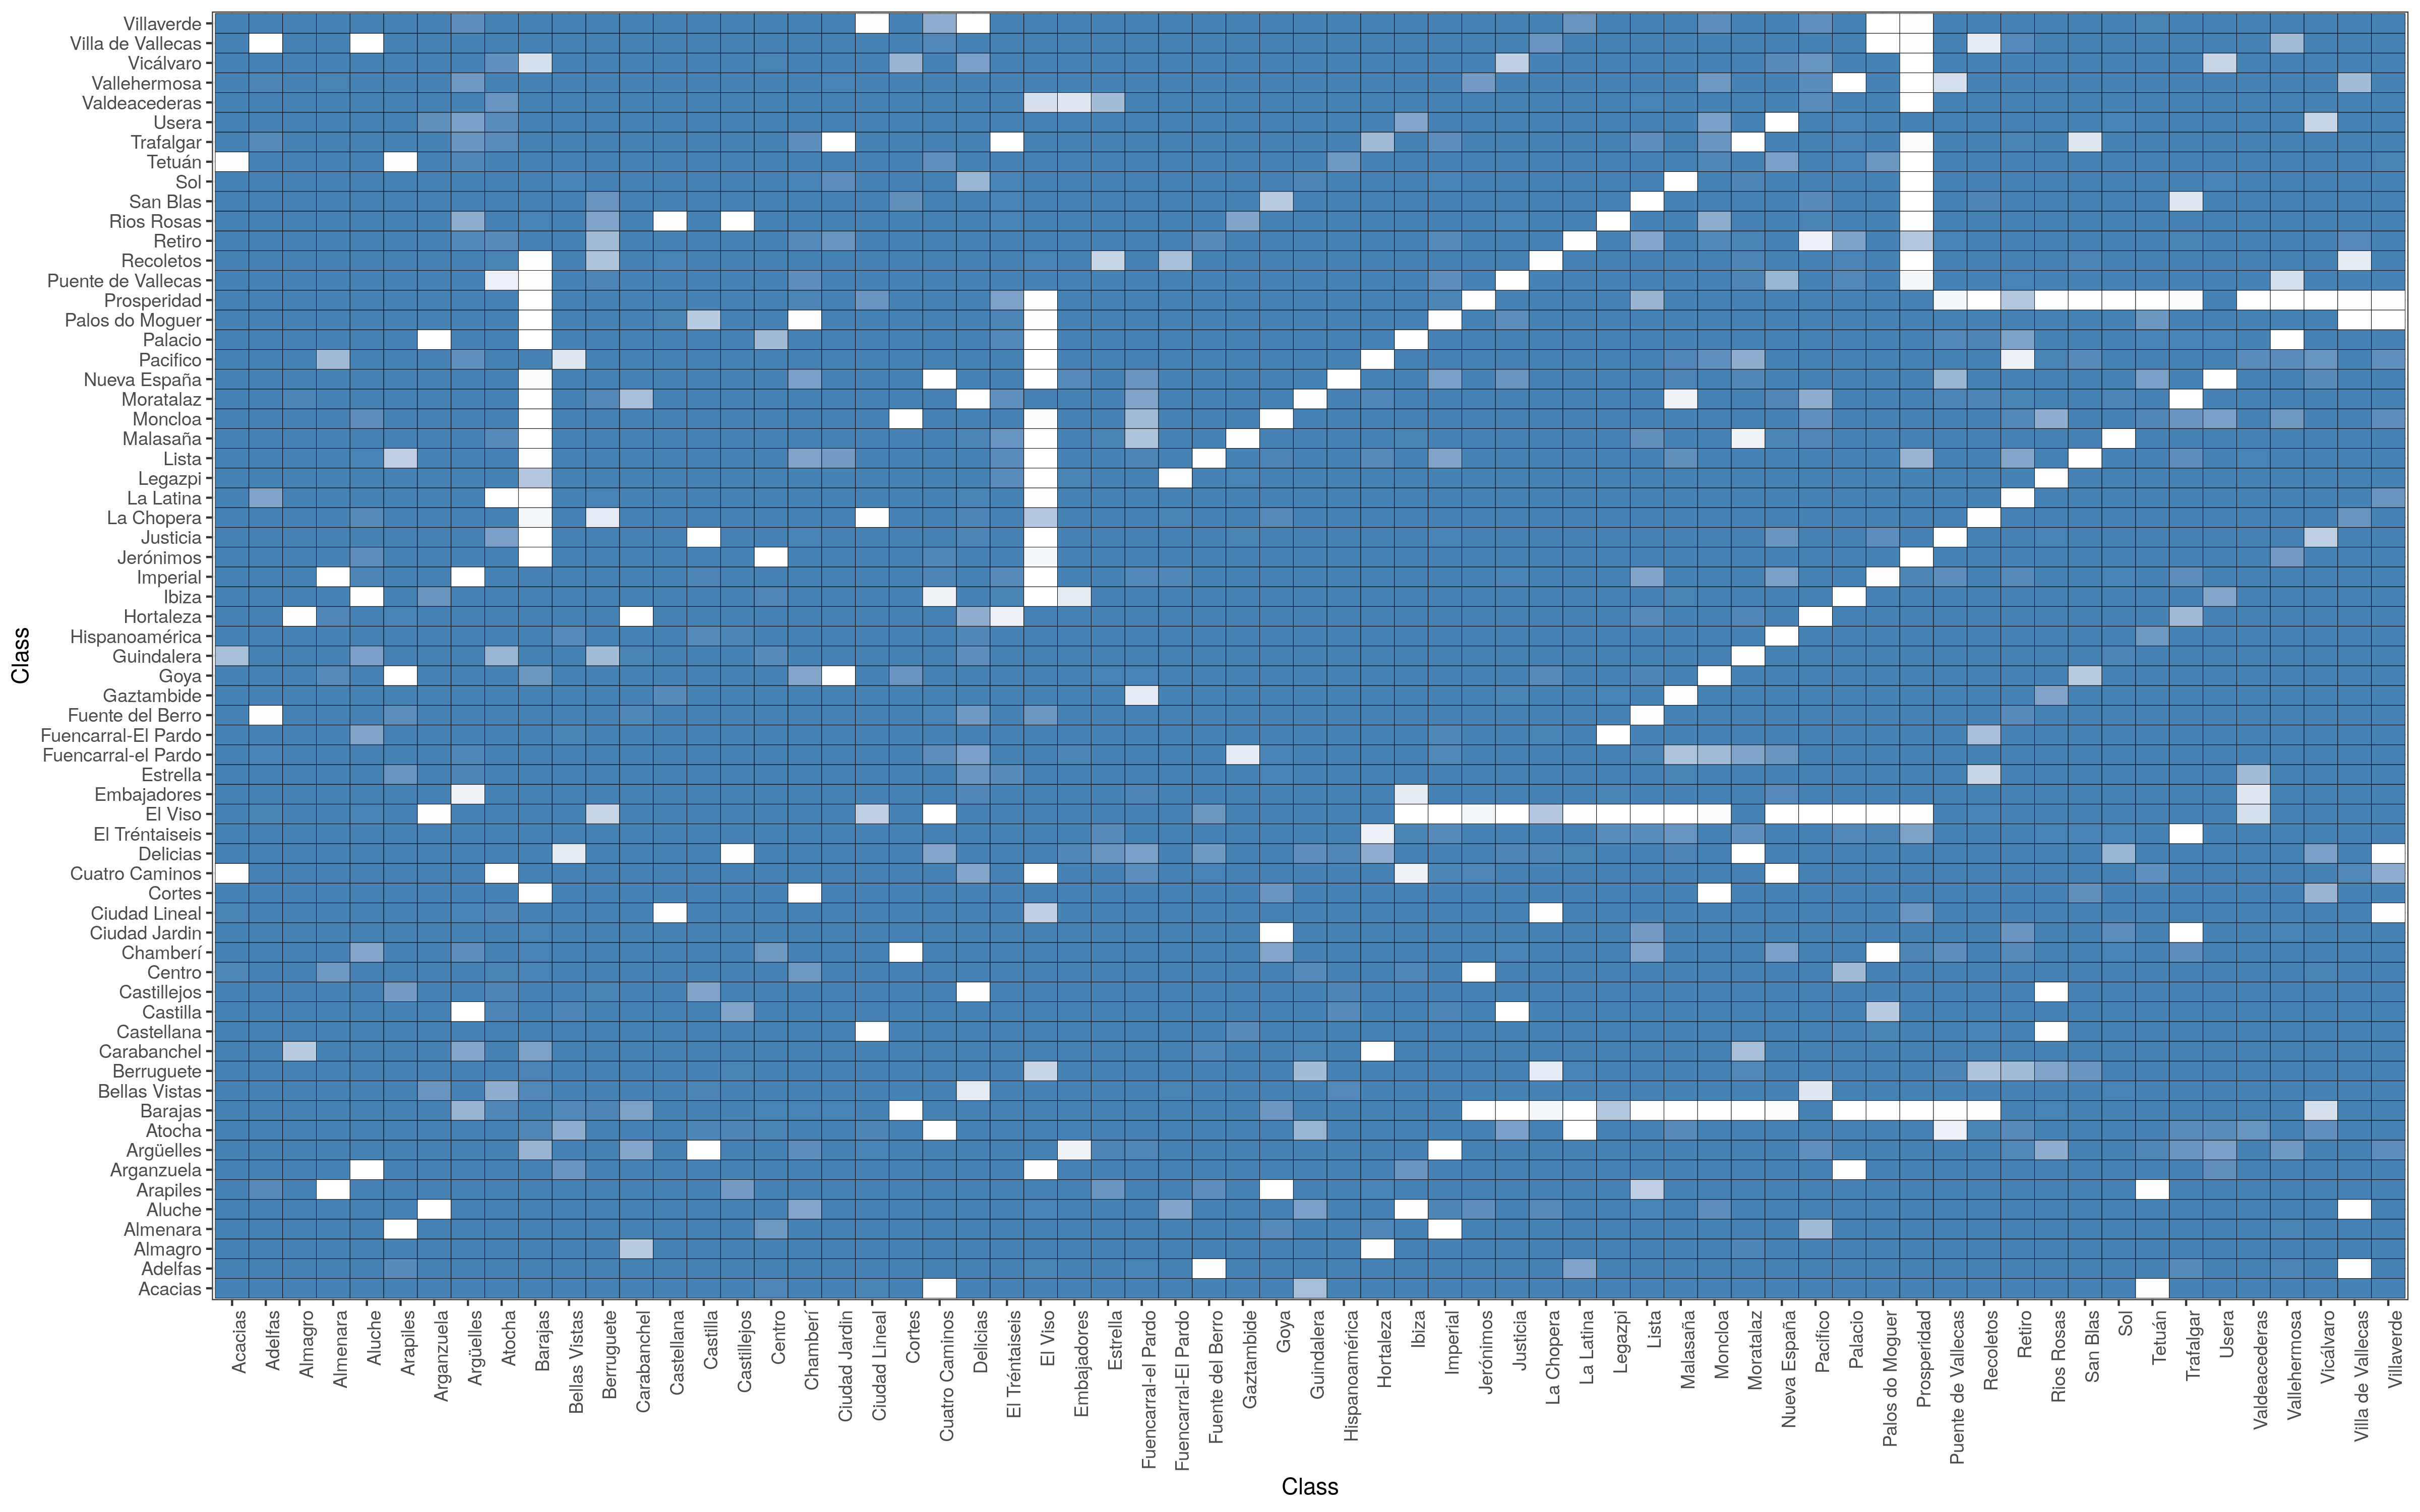

In [10]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [11]:
options(repr.plot.height=10,repr.plot.width=8,repr.plot.res = 200)
par(mar=c(9,9,1,8))

dist(as.matrix(1 -resm),method = "binary") %>% 
    hclust(method="complete") %>% 
    as.dendrogram() %>%
    set("labels_col", "blue") %>% set("labels_cex", 0.7) -> dend


Estableciendo un punto de corte en 0.9, ¿cuantos clusters aparecen?

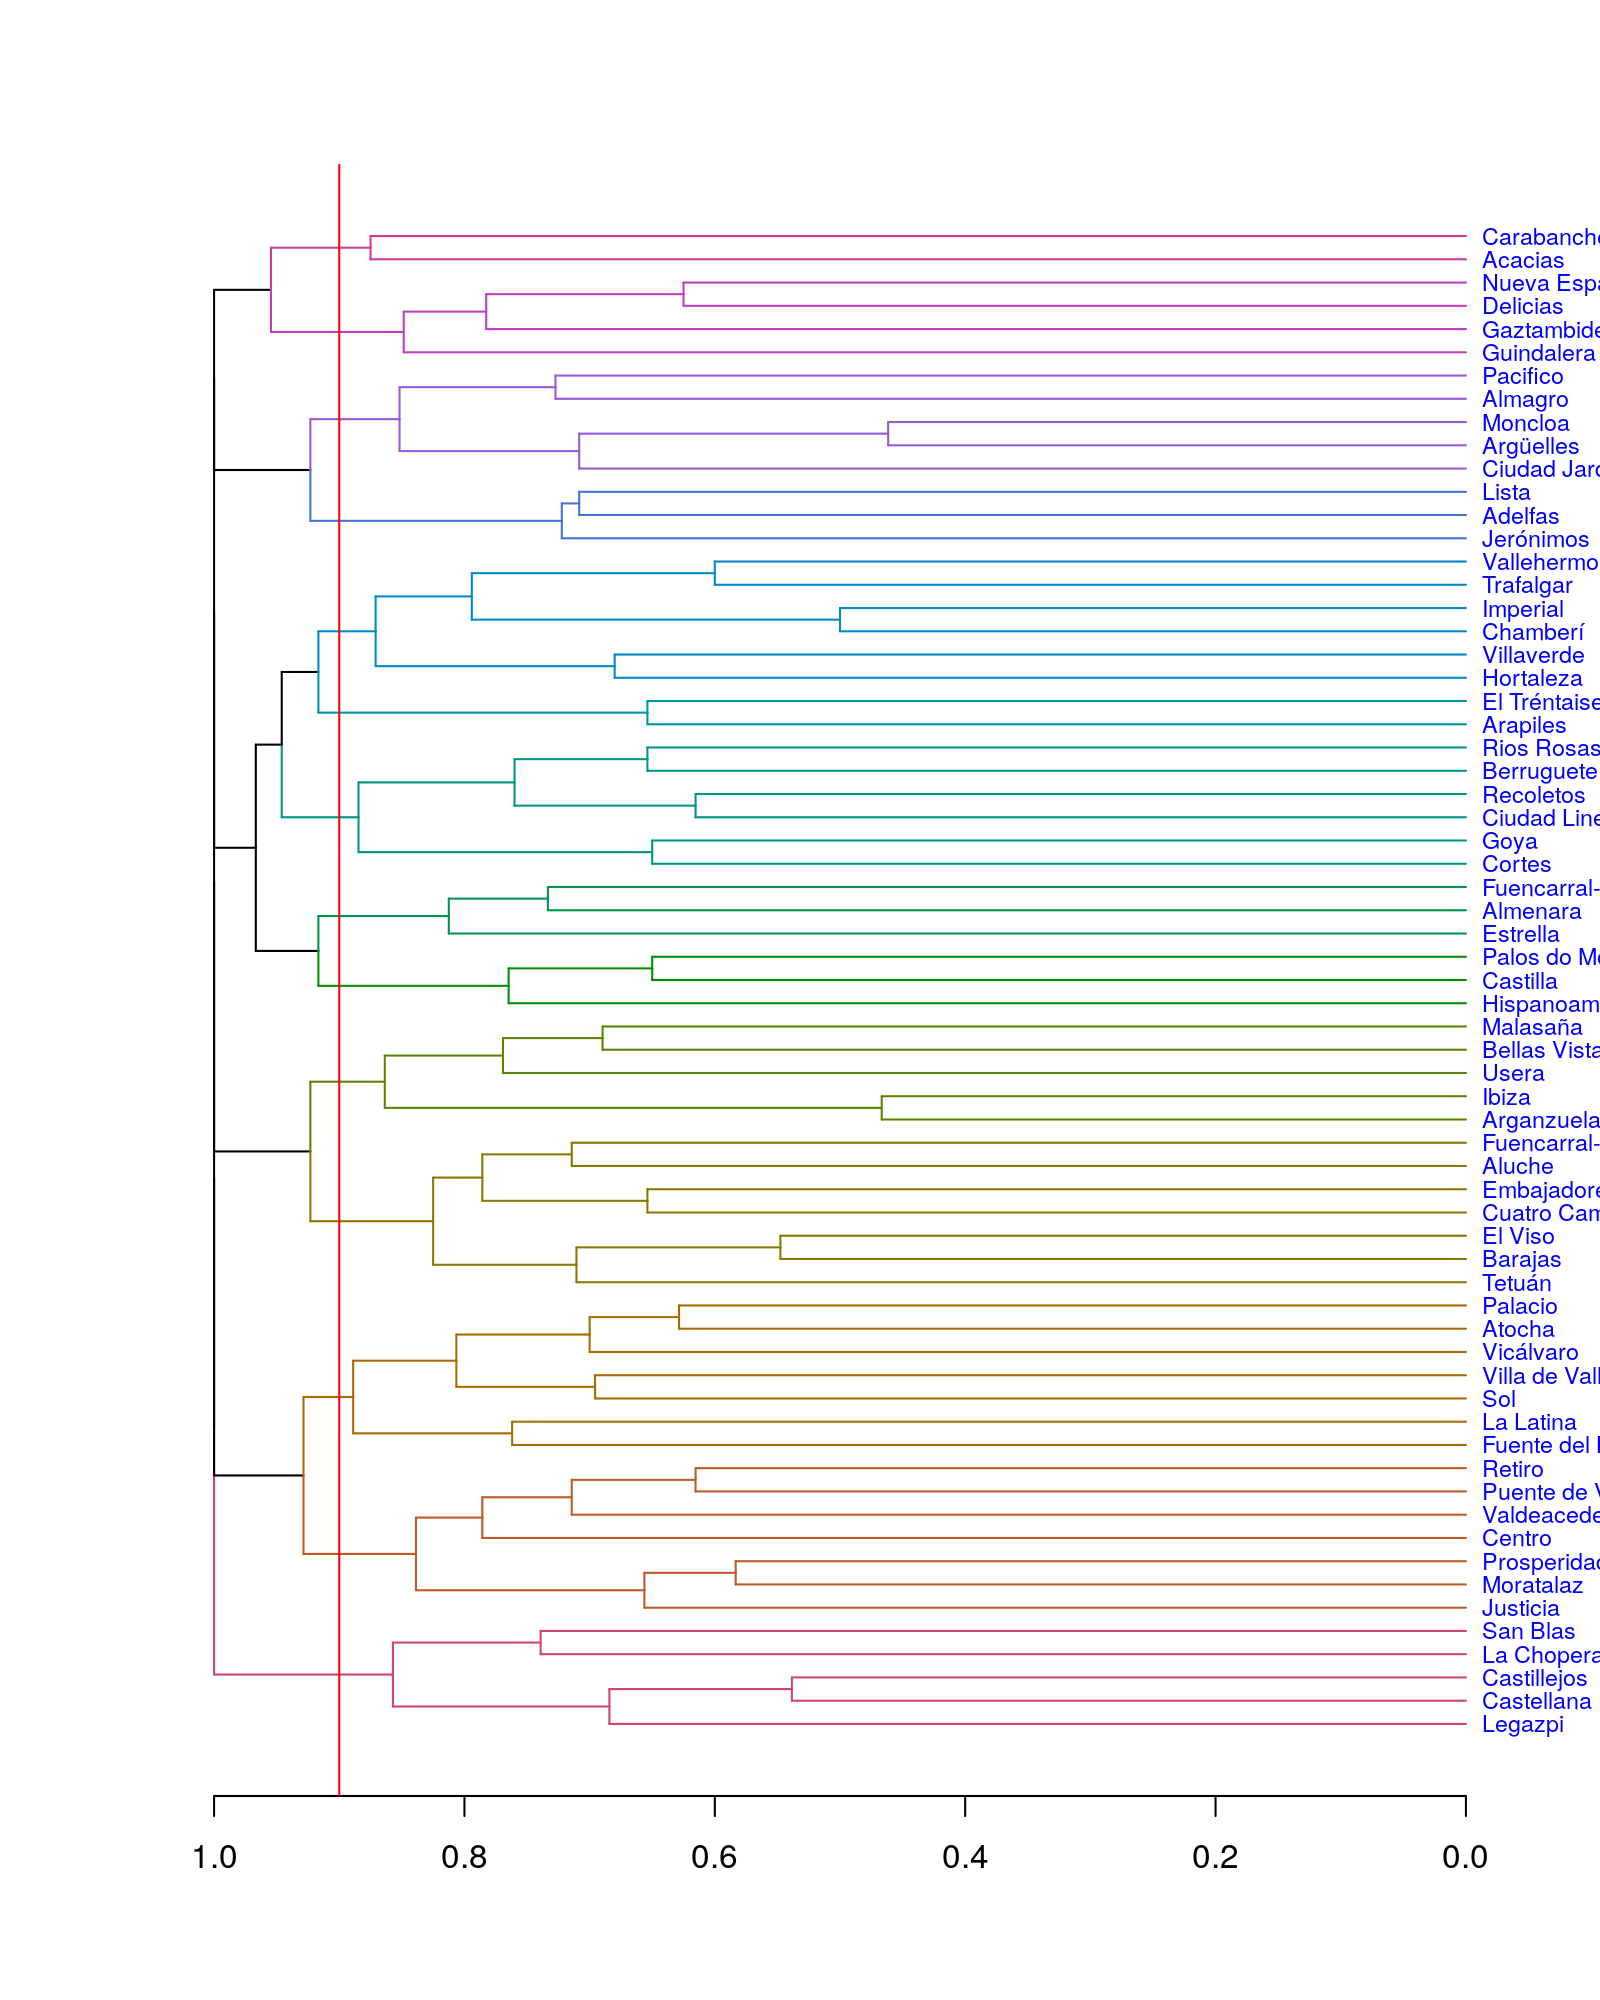

In [12]:
plot(color_branches(dend, h=0.9), horiz=TRUE)
abline(v=0.9,col="red")

In [13]:
cls = cutree(dend,h=0.9)
table(unique(df_madrid$Neighbourhood), cls)

                     cls
                      1 2 3 4 5 6 7 8 9 10 11 12 13 14
  Acacias             0 0 0 0 0 0 0 0 0  1  0  0  0  0
  Adelfas             1 0 0 0 0 0 0 0 0  0  0  0  0  0
  Almagro             0 0 0 0 0 0 0 0 0  1  0  0  0  0
  Almenara            0 0 0 0 0 0 0 0 0  1  0  0  0  0
  Aluche              0 0 0 0 0 0 0 0 0  0  0  0  1  0
  Arapiles            0 0 0 0 0 0 0 0 0  1  0  0  0  0
  Arganzuela          0 0 0 0 0 0 0 0 1  0  0  0  0  0
  Argüelles           0 0 0 0 1 0 0 0 0  0  0  0  0  0
  Atocha              0 0 0 0 0 0 0 0 0  1  0  0  0  0
  Barajas             0 0 0 0 0 0 0 0 0  0  1  0  0  0
  Bellas Vistas       0 0 0 0 0 0 0 0 0  0  0  0  1  0
  Berruguete          0 0 0 0 0 0 1 0 0  0  0  0  0  0
  Carabanchel         0 0 0 0 0 0 0 0 1  0  0  0  0  0
  Castellana          0 0 0 0 0 0 0 0 0  0  0  0  0  1
  Castilla            0 0 1 0 0 0 0 0 0  0  0  0  0  0
  Castillejos         0 0 0 0 0 0 0 0 0  0  0  0  1  0
  Centro              0 0 0 0 0 0 0 1 0 

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [14]:
aux <- data.frame('Neighbourhood'=names(cls),'neighb_id'=cls)
df_madrid <- merge(df_madrid, aux, by='Neighbourhood')

Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [15]:
idx<-sample(1:nrow(df_madrid),nrow(df_madrid)*0.7)
df_madrid.train<-df_madrid[idx,]
df_madrid.test <-df_madrid[-idx,]

In [16]:
# Con esto comprobamos que hay que hacer un model `lm` ya que se observa que la
# distribución podria resolverse con una regresión lineal
# library(GGally)
# ggpairs(df_madrid.train,
#         lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue')),
#         cardinality_threshold=400
#        )

In [17]:
model_squareMetters<-lm(Square.Meters~Accommodates+Price+Bedrooms+neighb_id,data=df_madrid.train)
# model_squareMetters<-lm(Square.Meters~.,data=df_madrid.train)
summary(model_squareMetters)


Call:
lm(formula = Square.Meters ~ Accommodates + Price + Bedrooms + 
    neighb_id, data = df_madrid.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.051 -12.195  -1.506   8.725  69.182 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  12.36398    6.91979   1.787 0.076611 .  
Accommodates  2.21202    1.39055   1.591 0.114410    
Price         0.36717    0.05769   6.364 4.15e-09 ***
Bedrooms     11.65985    3.17966   3.667 0.000373 ***
neighb_id    -0.35551    0.67728  -0.525 0.600661    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.54 on 115 degrees of freedom
  (3800 observations deleted due to missingness)
Multiple R-squared:  0.7032,	Adjusted R-squared:  0.6929 
F-statistic: 68.11 on 4 and 115 DF,  p-value: < 2.2e-16


 Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

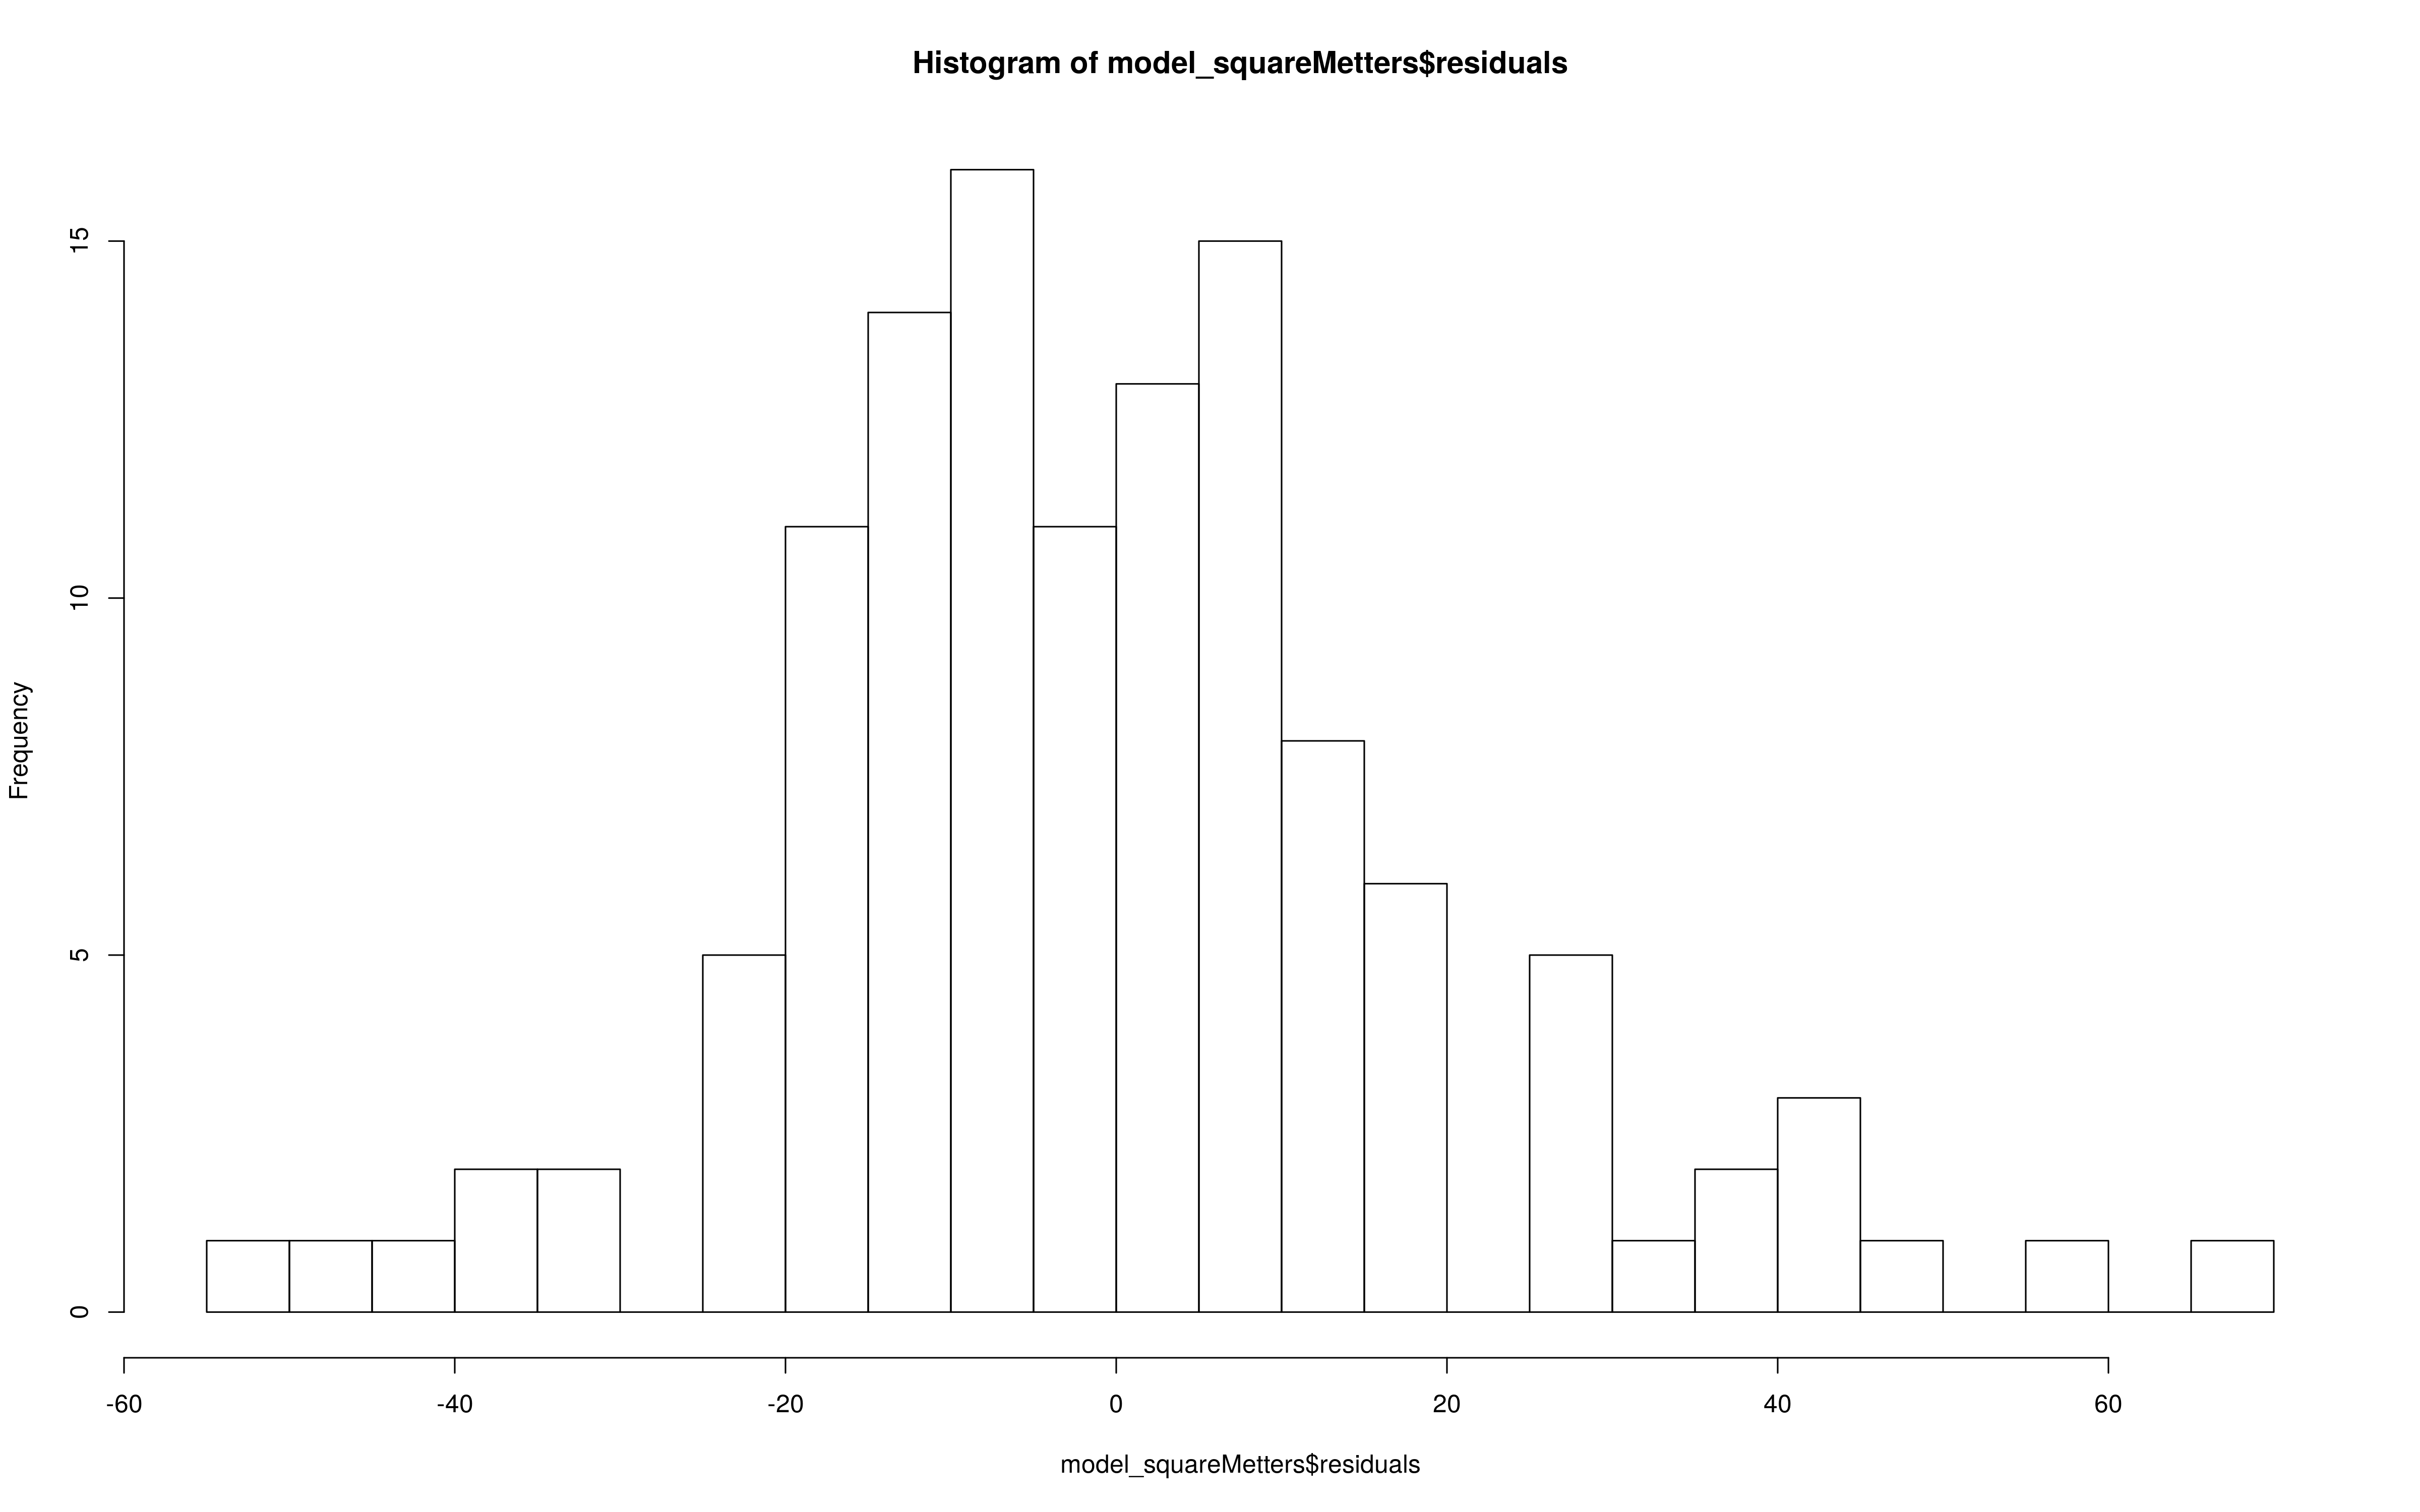

In [18]:
options(repr.plot.height=10,repr.plot.width=16,repr.plot.res = 300)
hist(model_squareMetters$residuals,breaks=30)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [19]:
model_squareMetters$xlevels[['Neighbourhood']] <- union(model_squareMetters$xlevels[['Neighbourhood']], levels(df_madrid.test$Neighbourhood))
df_madrid$predict <- predict(model_squareMetters, df_madrid)

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels):
“variable 'Neighbourhood' is not a factor”


In [20]:
predicted <- model_squareMetters$coefficients[1] + 
                model_squareMetters$coefficients['Accommodates'] * 6 +
                model_squareMetters$coefficients['Price'] * 80 +
                model_squareMetters$coefficients['Bedrooms'] * 3 +
                model_squareMetters$coefficients['neighb_id'] * cls['Sol']
 
paste('La estimacion para un piso en Sol par 6 personas y 3 habitaciones a 80 €/noche son', {predicted}, 'm²')

[1] "La estimacion para un piso en Sol par 6 personas y 3 habitaciones a 80 €/noche son 87.1449159723883 m²"

In [21]:
to_predict = data.frame('Neighbourhood'='Sol', 'neighb_id'=cls['Sol'],'Accommodates'=6,'Bathrooms'= NA,'Bedrooms'= 3,'Beds'=NA,'Price'=80,'Square.Feet'= NA,'Guests.Included'=NA,'Extra.People'=NA,'Review.Scores.Rating' = NA,'Latitude'= NA,'Longitude'=NA)

predicted <- predict(model_squareMetters, to_predict)

paste('La estimacion para un piso en Sol par 6 personas y 3 habitaciones a 80 €/noche son', {predicted}, 'm² usando la funcion predict')

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels):
“variable 'Neighbourhood' is not a factor”


[1] "La estimacion para un piso en Sol par 6 personas y 3 habitaciones a 80 €/noche son 87.1449159723883 m² usando la funcion predict"

In [22]:
variation <- model_squareMetters$coefficients['Bedrooms']

paste('Con cada habitación extra los alojamientos varían', {variation}, 'm²')

[1] "Con cada habitación extra los alojamientos varían 11.6598532205477 m²"

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [23]:
df_madrid$Square.Meters <- ifelse(is.na(df_madrid$predict), df_madrid$Square.Meters, df_madrid$predict)

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [24]:
desired_apt <- data.frame('Accommodates'= 8,'Bathrooms'=2,'Bedrooms'= 4,'Beds'= 10,'Price'= 80,'Guests.Included'= 1,'Extra.People'= 1,'Review.Scores.Rating'= 60,'Latitude'= 40.456965,'Longitude'= -3.677207,'Square.Meters'= 100)

In [25]:
get_nearby_appartments <- function(origin_df, desired_apt, items) {
    
    pca_df_madrid <- origin_df[ , c('Accommodates','Bathrooms','Bedrooms','Beds','Price','Guests.Included','Extra.People','Review.Scores.Rating','Latitude','Longitude','Square.Meters')]
    df_comp <- prcomp(na.omit(pca_df_madrid),center = TRUE, scale. = TRUE)

    comp_apt<-predict(df_comp, desired_apt)

    dist<-rowSums((comp_apt[rep(1, times = nrow(df_comp$x)), ]-df_comp$x)^2)

    nearby <- data.frame()
    for (it in order(dist)[1:items]) {
        nearby <- rbind(nearby,  origin_df[it, ])
    }
    nearby
}

In [26]:
get_nearby_appartments(df_madrid, desired_apt, 5)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id,predict
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1022,Cortes,4,2,1,2,130,NA,1,0,95,40.41570,-3.695408,77.40400,9,77.40400
3873,Malasaña,4,1,1,1,55,NA,1,5,NA,40.42434,-3.704879,50.57752,7,50.57752
4556,Palos do Moguer,3,1,2,2,110,NA,1,0,NA,40.40147,-3.699590,78.79749,11,78.79749
965,Cortes,4,1,1,1,65,NA,2,10,90,40.41196,-3.696432,53.53817,9,53.53817
1589,Embajadores,2,1,0,1,35,NA,2,0,89,40.40784,-3.702864,27.86131,5,27.86131


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?

In [31]:
pca_df_madrid <- df_madrid[ , c('Accommodates','Bathrooms','Bedrooms','Beds','Price','Guests.Included','Extra.People','Review.Scores.Rating','Latitude','Longitude','Square.Meters')]
df_comp <- prcomp(na.omit(pca_df_madrid),center = TRUE, scale. = TRUE)

aux <- cbind(df_comp$x, df_madrid$neighb_id)
colnames(aux)[12] <- "neighb_id"

aov(neighb_id ~., data = data.frame(aux))

paste("De tods las columnas vemos que ")

Warning message in cbind(df_comp$x, df_madrid$neighb_id):
“number of rows of result is not a multiple of vector length (arg 2)”


Call:
   aov(formula = neighb_id ~ ., data = data.frame(aux))

Terms:
                     PC1      PC2      PC3      PC4      PC5      PC6      PC7
Sum of Squares     42.54  1155.62     6.56    24.75     0.87   125.25    67.51
Deg. of Freedom        1        1        1        1        1        1        1
                     PC8      PC9     PC10     PC11 Residuals
Sum of Squares    114.21   257.63    13.20  6076.64  33922.00
Deg. of Freedom        1        1        1        1      4734

Residual standard error: 2.676866
Estimated effects are balanced